In [13]:

import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, Model
import matplotlib.pyplot as plt


In [14]:

with open('dataset/lego-train.pickle', 'rb') as train_fh:
    train_data = pickle.load(train_fh)

with open('dataset/lego-test.pickle', 'rb') as test_fh:
    test_data = pickle.load(test_fh)

print("Тип train_data:", type(train_data))
print("Тип test_data:", type(test_data))

print("Пример одного элемента train_data:", train_data[0])
print("Пример одного элемента test_data:", test_data[0])


Тип train_data: <class 'list'>
Тип test_data: <class 'list'>
Пример одного элемента train_data: (array([[[ 9],
        [ 9],
        [ 9],
        ...,
        [ 9],
        [ 9],
        [ 9]],

       [[ 9],
        [ 9],
        [ 9],
        ...,
        [ 9],
        [ 9],
        [ 9]],

       [[ 9],
        [ 9],
        [ 9],
        ...,
        [ 9],
        [ 9],
        [ 9]],

       ...,

       [[14],
        [14],
        [14],
        ...,
        [14],
        [14],
        [14]],

       [[15],
        [15],
        [15],
        ...,
        [15],
        [15],
        [15]],

       [[14],
        [14],
        [14],
        ...,
        [14],
        [14],
        [14]]], dtype=uint8), 4)
Пример одного элемента test_data: (array([[[ 9],
        [ 9],
        [ 9],
        ...,
        [ 9],
        [ 9],
        [ 9]],

       [[ 9],
        [ 9],
        [ 9],
        ...,
        [ 9],
        [ 9],
        [ 9]],

       [[ 9],
        [ 9],
        [ 9],
    

In [15]:
train_data_X = np.array([img for (img, _) in train_data])
train_data_y = np.array([lbl for (_, lbl) in train_data])

test_data_X = np.array([img for (img, _) in test_data])
test_data_y = np.array([lbl for (_, lbl) in test_data])

print("Размеры train_data_X:", train_data_X.shape)
print("Размеры train_data_y:", train_data_y.shape)
print("Размеры test_data_X:", test_data_X.shape)
print("Размеры test_data_y:", test_data_y.shape)


Размеры train_data_X: (451, 48, 48, 1)
Размеры train_data_y: (451,)
Размеры test_data_X: (150, 48, 48, 1)
Размеры test_data_y: (150,)


In [16]:
mean, std = 0.13, 0.31

train_data_X = (train_data_X - mean) / std
test_data_X = (test_data_X - mean) / std


In [17]:
num_classes = len(set(train_data_y))  

train_data_y = to_categorical(train_data_y, num_classes)
test_data_y = to_categorical(test_data_y, num_classes)

print("Форма train_data_y после one-hot encoding:", train_data_y.shape)
print("Форма test_data_y после one-hot encoding:", test_data_y.shape)


Форма train_data_y после one-hot encoding: (451, 10)
Форма test_data_y после one-hot encoding: (150, 10)


Сначала будем использовать Sequential

In [18]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(train_data_X.shape[1], train_data_X.shape[2], train_data_X.shape[3])),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,602 (1.22 MB)

 Trainable params: 318,602 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(train_data_X, train_data_y, epochs=10, validation_data=(test_data_X, test_data_y))


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1244 - loss: 58.4555 - val_accuracy: 0.2933 - val_loss: 2.1600
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4213 - loss: 1.8612 - val_accuracy: 0.6667 - val_loss: 1.0311
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7166 - loss: 0.8328 - val_accuracy: 0.9067 - val_loss: 0.3298
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8870 - loss: 0.3512 - val_accuracy: 0.9533 - val_loss: 0.1785
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9590 - loss: 0.1656 - val_accuracy: 0.9733 - val_loss: 0.0954
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9729 - loss: 0.0857 - val_accuracy: 0.9933 - val_loss: 0.0292
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9952 - loss: 0.0302 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 1.0000 - loss: 0.0224 - val_accuracy: 1.0000 - 

In [20]:
test_loss, test_acc = model.evaluate(test_data_X, test_data_y)
print("Точность на тестовых данных:", test_acc)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0011    
Точность на тестовых данных: 1.0


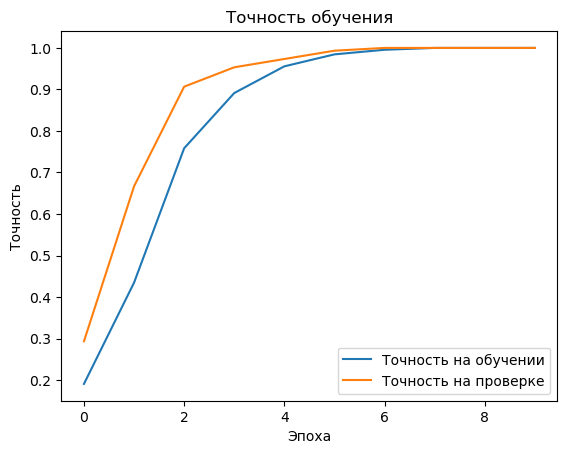

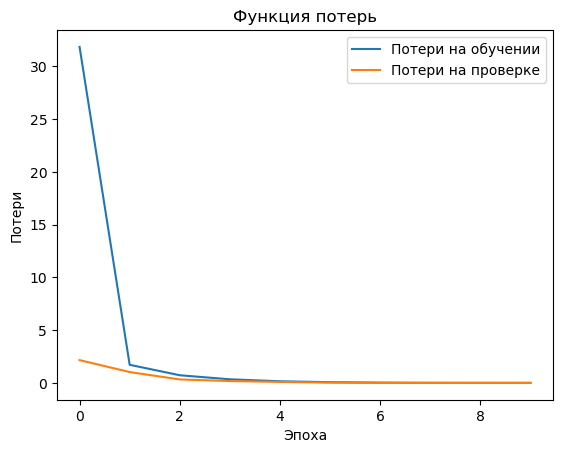

In [21]:
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на проверке')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.title('Точность обучения')
plt.show()

plt.plot(history.history['loss'], label='Потери на обучении')
plt.plot(history.history['val_loss'], label='Потери на проверке')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(loc='upper right')
plt.title('Функция потерь')
plt.show()


Прописываем архитектуру своей CNN

In [22]:
class CustomCNN(Model):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')
        self.pool1 = layers.MaxPooling2D((2, 2))
        self.conv2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')
        self.pool2 = layers.MaxPooling2D((2, 2))
        self.conv3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(128, activation='relu')
        self.dense2 = layers.Dense(num_classes, activation='softmax')
    
    def call(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

custom_model = CustomCNN()
custom_model.build(input_shape=(None, train_data_X.shape[1], train_data_X.shape[2], train_data_X.shape[3]))

custom_model.compile(optimizer='adam', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

custom_model.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'custom_cnn', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
custom_history = custom_model.fit(train_data_X, train_data_y, epochs=10, validation_data=(test_data_X, test_data_y))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.1692 - loss: 84.9751 - val_accuracy: 0.4467 - val_loss: 3.5588
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5816 - loss: 2.2873 - val_accuracy: 0.9133 - val_loss: 0.5194
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9233 - loss: 0.4208 - val_accuracy: 1.0000 - val_loss: 0.0824
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9899 - loss: 0.0666 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9996 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 8.4198e-04
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9984 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 5.1252e-04
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 2.8849e-04
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accurac

In [24]:
custom_test_loss, custom_test_acc = custom_model.evaluate(test_data_X, test_data_y)
print("Точность собственной модели на тестовых данных:", custom_test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.2971e-04 
Точность собственной модели на тестовых данных: 1.0


Далее сравниваем Sequential и свою модель

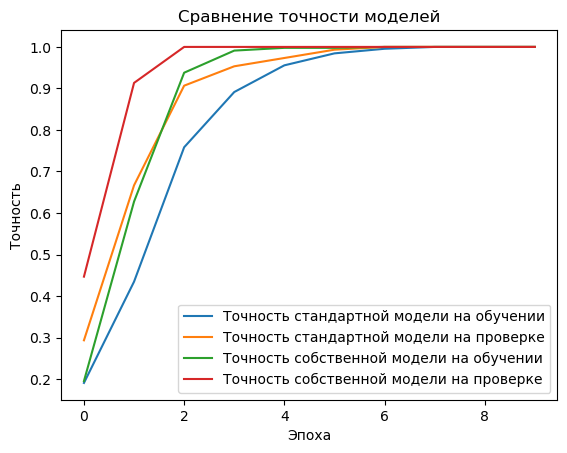

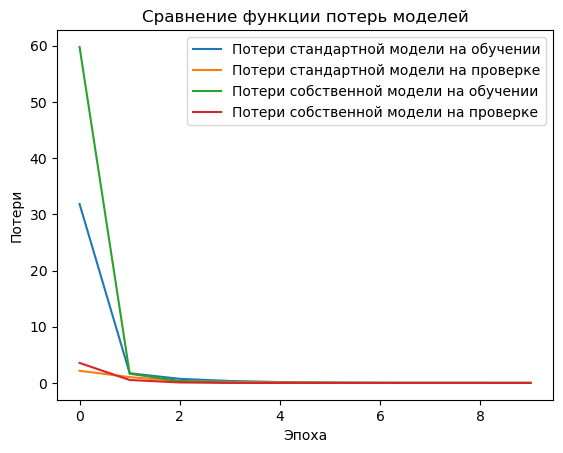

In [25]:
plt.plot(history.history['accuracy'], label='Точность стандартной модели на обучении')
plt.plot(history.history['val_accuracy'], label='Точность стандартной модели на проверке')
plt.plot(custom_history.history['accuracy'], label='Точность собственной модели на обучении')
plt.plot(custom_history.history['val_accuracy'], label='Точность собственной модели на проверке')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.title('Сравнение точности моделей')
plt.show()

plt.plot(history.history['loss'], label='Потери стандартной модели на обучении')
plt.plot(history.history['val_loss'], label='Потери стандартной модели на проверке')
plt.plot(custom_history.history['loss'], label='Потери собственной модели на обучении')
plt.plot(custom_history.history['val_loss'], label='Потери собственной модели на проверке')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(loc='upper right')
plt.title('Сравнение функции потерь моделей')
plt.show()
